<a href="https://colab.research.google.com/github/waghmareswapnil21/icc-data-analysis/blob/main/ICC_Data_Analysis_Swapnil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [2]:
working_dir='/content/drive/My Drive/Almabeter/'
df_icc=pd.read_csv(working_dir+'International_T20_Data.csv')


In [3]:
df_icc.head()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,NaN,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_icc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   innings                      1417 non-null   object 
 1   meta.data_version            1417 non-null   float64
 2   meta.created                 1417 non-null   object 
 3   meta.revision                1417 non-null   int64  
 4   info.dates                   1417 non-null   object 
 5   info.gender                  1417 non-null   object 
 6   info.match_type              1417 non-null   object 
 7   info.outcome.by.wickets      651 non-null    float64
 8   info.outcome.winner          1372 non-null   object 
 9   info.overs                   1417 non-null   int64  
 10  info.player_of_match         1255 non-null   object 
 11  info.teams                   1417 non-null   object 
 12  info.toss.decision           1417 non-null   object 
 13  info.toss.winner  

In [5]:
first_inning=eval(df_icc.loc[0,'innings'])[0]

In [6]:
second_inning=eval(df_icc.loc[0,'innings'])[1]

In [7]:
second_inning.keys()

dict_keys(['2nd innings'])

In [8]:
type(first_inning['1st innings'])

dict

In [9]:
first_inning['1st innings'].keys()

dict_keys(['team', 'deliveries'])

In [10]:
# who plays first innings (extract team key)
first_inning['1st innings']['team']

'Australia'

In [11]:
# extract deliveries key
first_inning['1st innings']['deliveries']

[{0.1: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.4: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
 {0.5: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.6: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 3, 'extras': 0, 'total': 3}}},
 {1.1: {'batsman': 'M Klinger',
   'bowler': 'KMDN Kulasekara',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 

In [12]:
type(first_inning['1st innings']['deliveries'])

list

In [13]:
len(first_inning['1st innings']['deliveries'])

125

In [14]:
# check the first element
first_inning['1st innings']['deliveries'][0][0.1]['runs']['extras']

0

In [15]:
first_inning_deliveries=first_inning['1st innings']['deliveries']
second_inning_deliveries=second_inning['2nd innings']['deliveries'] 
second_inning_deliveries

[{0.1: {'batsman': 'N Dickwella',
   'bowler': 'PJ Cummins',
   'non_striker': 'WU Tharanga',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.2: {'batsman': 'WU Tharanga',
   'bowler': 'PJ Cummins',
   'extras': {'legbyes': 1},
   'non_striker': 'N Dickwella',
   'runs': {'batsman': 0, 'extras': 1, 'total': 1}}},
 {0.3: {'batsman': 'N Dickwella',
   'bowler': 'PJ Cummins',
   'non_striker': 'WU Tharanga',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.4: {'batsman': 'N Dickwella',
   'bowler': 'PJ Cummins',
   'non_striker': 'WU Tharanga',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.5: {'batsman': 'N Dickwella',
   'bowler': 'PJ Cummins',
   'non_striker': 'WU Tharanga',
   'runs': {'batsman': 3, 'extras': 0, 'total': 3}}},
 {0.6: {'batsman': 'WU Tharanga',
   'bowler': 'PJ Cummins',
   'non_striker': 'N Dickwella',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0},
   'wicket': {'fielders': ['TD Paine'],
    'kind': 'caught',
    'player_out': 'WU T

In [18]:
def get_innings_score(inning_deliveries):
 

  total_inning_deliveries_df=pd.DataFrame(columns=['delivery_number','runs_scored','wicket'])

  for delivery in inning_deliveries:
    delivery_number=list(delivery.keys())[0]
    extras=delivery[delivery_number]['runs']['extras']
    total=delivery[delivery_number]['runs']['total']
    if 'wicket' in delivery[delivery_number]:
      wicket=1
    else:
      wicket=0
    # write a code to append the info of each delivery in the dataframe
    total_inning_deliveries_df=total_inning_deliveries_df.append({'delivery_number':delivery_number,'runs_scored':total,'wicket':wicket},ignore_index=True)
    
  total_inning_deliveries_df['over']=total_inning_deliveries_df.apply(lambda s:int(s['delivery_number']),axis=1)
  total_inning_deliveries_df['over']=total_inning_deliveries_df['over']+1
  total_inning_runs_df=total_inning_deliveries_df.groupby('over').agg({'runs_scored':sum,'wicket':sum}).reset_index()

  total_inning_runs_df['total_runs']=total_inning_runs_df['runs_scored'].cumsum()


  return total_inning_runs_df

In [19]:
first_inning_df=get_innings_score(first_inning_deliveries)
second_inning_df=get_innings_score(second_inning_deliveries)


In [20]:
first_inning_df['innings']='first'
second_inning_df['innings']='second'
first_inning_df['team']=first_inning['1st innings']['team']
second_inning_df['team']=second_inning['2nd innings']['team']


In [21]:
match_score=pd.concat([first_inning_df,second_inning_df])
match_score

,over,runs_scored,wicket,total_runs,innings,team
0,1,6.0,0.0,6.0,first,Australia
1,2,7.0,0.0,13.0,first,Australia
2,3,6.0,0.0,19.0,first,Australia
3,4,8.0,0.0,27.0,first,Australia
4,5,16.0,0.0,43.0,first,Australia
5,6,4.0,0.0,47.0,first,Australia
6,7,6.0,0.0,53.0,first,Australia
7,8,8.0,0.0,61.0,first,Australia
8,9,6.0,0.0,67.0,first,Australia
9,10,8.0,0.0,75.0,first,Australia


Text(0.5, 1.0, 'Run Worm Graph')

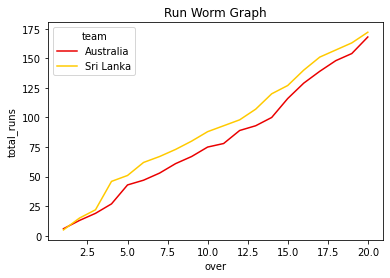

In [35]:
sns.lineplot(x = "over", y = "total_runs", data = match_score, hue = "team",style = "team", 
            palette = "hot", dashes = False,  legend="brief").set_title('Run Worm Graph')
            